In [1]:
#Sales Prediction using Machine Learning
#This Project uses predicts sales based on advertising budgets across different media channels TV, Radio and Newspaper using machine learning techniques.

In [2]:
#Importing libraries
#Data manipulation
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Warning filter
import warnings
warnings.filterwarnings('ignore')

#Plot style
plt.style.use('ggplot')
sns.set_palette('Set2')

In [3]:
#Loading Dataset
df = pd.read_csv("advertising.csv")

#Show the first 5 rows
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#Checking Data Structure
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [5]:
#Describing numerical columns
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
#Checking for Missing Values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
#Visualising Data

<function matplotlib.pyplot.show(close=None, block=None)>

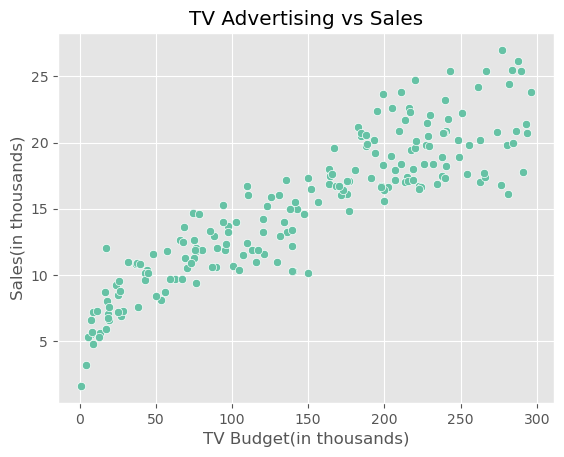

In [9]:
#Scatter Plot: TV vs Sales
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title("TV Advertising vs Sales")
plt.xlabel("TV Budget(in thousands)")
plt.ylabel("Sales(in thousands)")
plt.grid(True)
plt.show

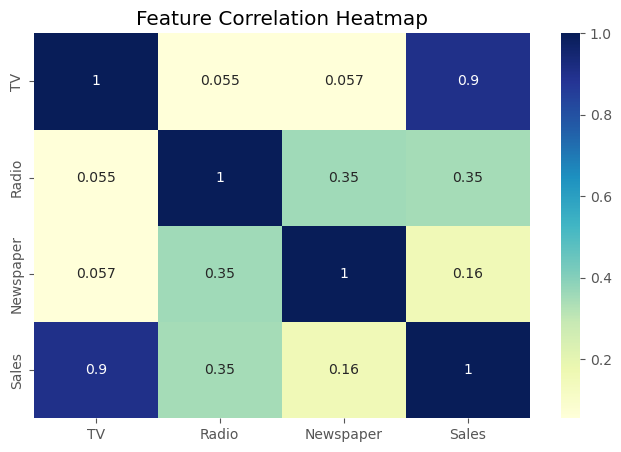

In [10]:
#Heatmap to see correlations
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

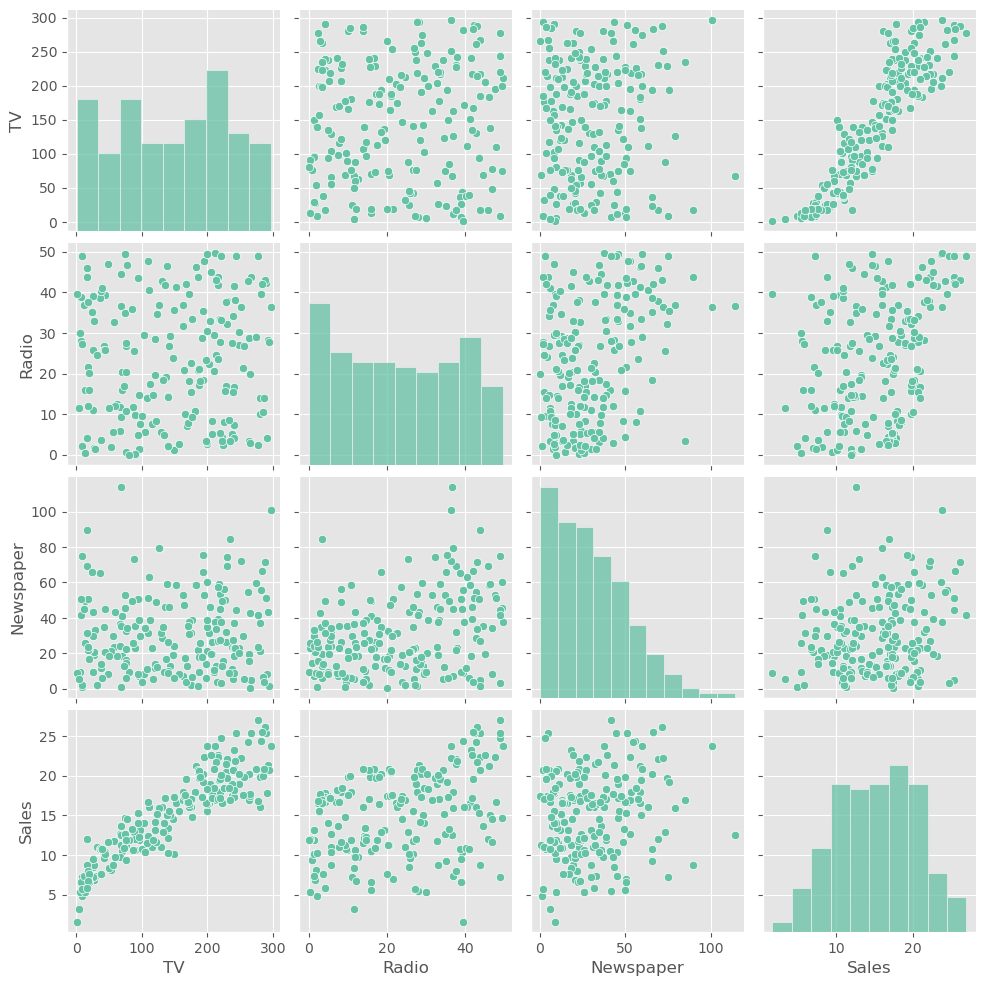

In [11]:
#Pairplot for pattern recognition
sns.pairplot(df)
plt.show

In [13]:
#Selecting features and Target
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [14]:
#Splitting the Data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [15]:
#Checking shape of Data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (160, 3)
Testing data shape: (40, 3)


In [16]:
#Creating and Training Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
#Displaying Model Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 4.714126402214131
Coefficients: [0.05450927 0.10094536 0.00433665]


In [18]:
#Predicting Sales using the test set
y_pred = model.predict(x_test)

In [21]:
#Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [23]:
#Print evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1.274826210954934
Mean Squared Error (MSE): 2.9077569102710905
Root Mean Squared Error (RMSE): 1.7052146229349228
R² Score: 0.9059011844150826


In [25]:
#Creating a Dataframe for comparison
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

<function matplotlib.pyplot.show(close=None, block=None)>

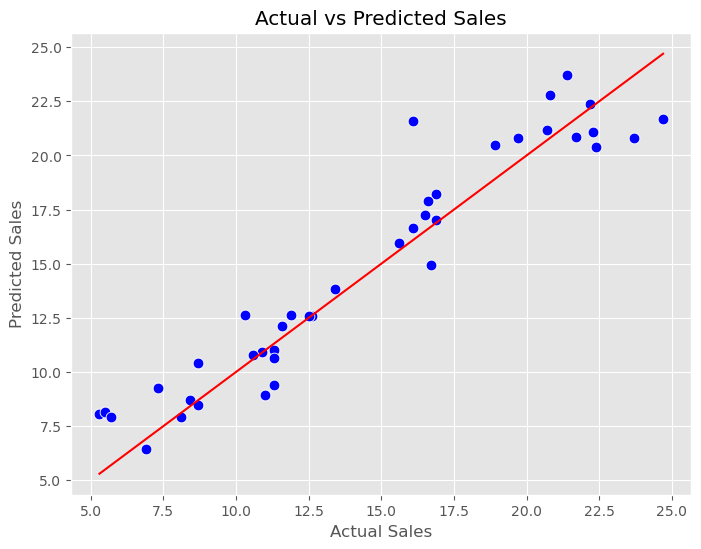

In [26]:
#Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, color='blue',s=60)
sns.lineplot(x='Actual', y='Actual', data=results_df, color='red')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.grid(True)
plt.show

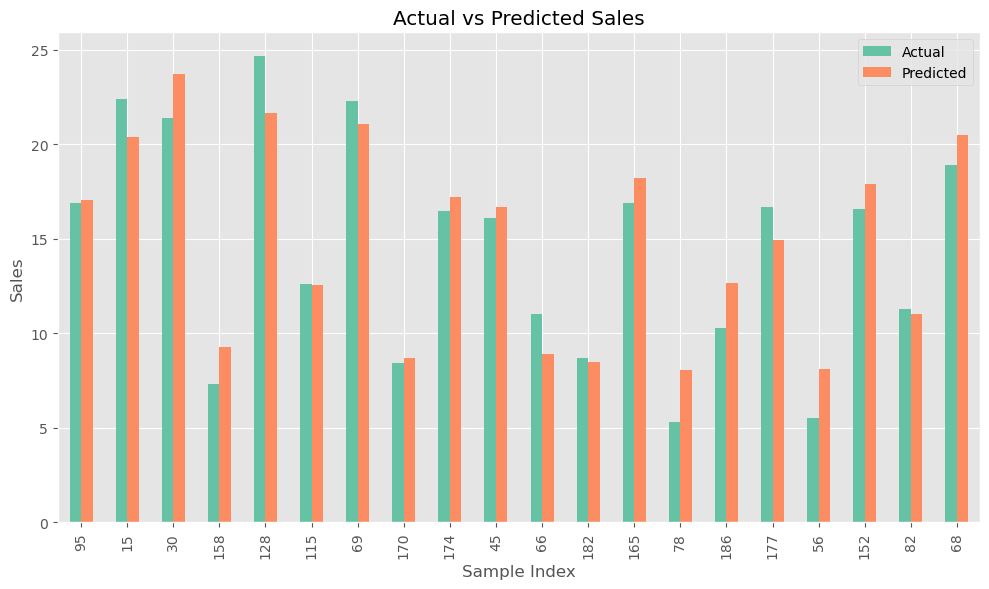

In [27]:
#Visualising Actual vs Predicted Sales
results_df.head(20).plot(kind='bar', figsize=(10,6))
plt.title('Actual vs Predicted Sales')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()